# 获取数据集


### 导入所需模块

In [2]:
#导入第三方库
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

### 获取数据

In [3]:
# 读取鸢尾花数据集
iris = load_iris()
print("鸢尾花数据集的返回值：\n", iris)
# 返回值是一个继承自字典的Bench
print("鸢尾花的特征值:\n", iris["data"])
print("鸢尾花的目标值：\n", iris.target)
print("鸢尾花特征的名字：\n", iris.feature_names)
print("鸢尾花目标值的名字：\n", iris.target_names)
print("鸢尾花的描述：\n", iris.DESCR)

鸢尾花数据集的返回值：
 {'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4

# 数据基本处理

In [4]:
# 划分训练集和测试集
# x_train,x_test,y_train,y_test为训练集特征值、测试集特征值、训练集目标值、测试集目标值
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=22)

In [5]:
X_train.shape


(120, 4)

In [6]:
# 测试集占0.2
X_test.shape

(30, 4)

In [7]:
transfer = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.transform(X_test)


In [8]:
estimator = KNeighborsClassifier()
estimator.fit(X_train, y_train)
KNeighborsClassifier()

KNeighborsClassifier()

In [9]:
y_pre = estimator.predict(X_test)
print("预测值是:\n", y_pre)
print("预测值和真实值的对比是:\n", y_pre == y_test)

预测值是:
 [0 2 1 2 1 1 1 1 1 0 2 1 2 2 0 2 1 1 1 1 0 2 0 1 2 0 2 2 2 2]
预测值和真实值的对比是:
 [ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]


# 构建模型

In [10]:
# 构建人工神经网络
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(4, ), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [11]:
# 显示模型的所有层
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 编译模型
# 指定损失函数，优化器，评价指标
# 多分类问题loss使用交叉熵，评价指标为准确性
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics="accuracy")

history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))

=============================] - 0s 15ms/step - loss: 0.0311 - accuracy: 0.9881 - val_loss: 0.0711 - val_accuracy: 0.9667
Epoch 862/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0301 - accuracy: 0.9913 - val_loss: 0.0721 - val_accuracy: 0.9667
Epoch 863/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0323 - accuracy: 0.9881 - val_loss: 0.0715 - val_accuracy: 0.9667
Epoch 864/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0621 - accuracy: 0.9704 - val_loss: 0.0727 - val_accuracy: 0.9667
Epoch 865/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0321 - accuracy: 0.9881 - val_loss: 0.0725 - val_accuracy: 0.9667
Epoch 866/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0351 - accuracy: 0.9829 - val_loss: 0.0736 - val_accuracy: 0.9667
Epoch 867/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0741 - val_accuracy: 0.9667
Epoch 868/1000
4/4 [

In [17]:
# 模型预测
y_pre_proba = model.predict(X_test)         # 返回每个类别的概率
y_pre = model.predict_classes(X_test)       # 返回最大概率的类别

C:\Users\PC_SKY_WYT\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



In [19]:
# 模型评分
scores = []
for i in range(len(y_test)):
    if y_pre[i] == y_test[i]:
        scores.append(1)
    else:
        scores.append(0)

accuracy = sum(scores) / len(scores)
print(accuracy)

0.9666666666666667


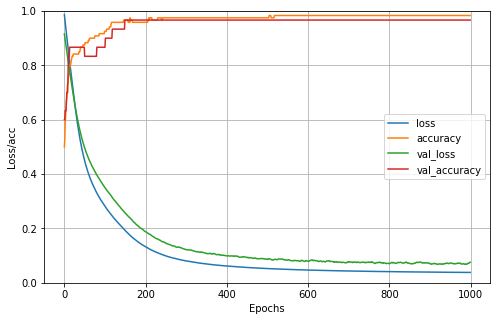

In [21]:
# 绘制训练曲线
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss/acc')
plt.gca().set_ylim(0, 1)
plt.show()